# Crime Maps

- This code is used to generate maps of crime data in Los Angeles

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx

In [3]:
crime = pd.read_csv('../datasets/crime_final.csv')
print(crime.shape)
crime.head().T

(2210104, 337)


,0,1,2,3,4
nu_index,0,1,2,3,4
DR_NO,1307355,11401303,70309629,90631215,100100501
Date Rptd,02/20/2010 12:00:00 AM,09/13/2010 12:00:00 AM,08/09/2010 12:00:00 AM,01/05/2010 12:00:00 AM,01/03/2010 12:00:00 AM
DATE OCC,2010-02-20,2010-09-12,2010-08-09,2010-01-05,2010-01-02
TIME OCC,1350,45,1515,150,2100
...,...,...,...,...,...
P_burglary,0,0,0,0,0
P_mvt,0,0,0,0,0
P_btfv,0,0,0,0,0
P_theft_personal,0,0,0,0,0


In [4]:
gdf = geopandas.read_file('../datasets/crime_maps.shp')
print(gdf.shape)
gdf.head(3).T

(272, 45)


,0,1,2
slug,acton,adams-normandie,agoura-hills
set,L.A. County Neighborhoods (Current),L.A. County Neighborhoods (Current),L.A. County Neighborhoods (Current)
kind,L.A. County Neighborhood (Current),L.A. County Neighborhood (Current),L.A. County Neighborhood (Current)
external_i,acton,adams-normandie,agoura-hills
place,Acton,Adams-Normandie,Agoura Hills
display_na,Acton L.A. County Neighborhood (Current),Adams-Normandie L.A. County Neighborhood (Curr...,Agoura Hills L.A. County Neighborhood (Current)
sqmi,39.3391089485,0.805350187789,8.14676029818
type,unincorporated-area,segment-of-a-city,standalone-city
name_1,None,None,None
slug_1,None,None,None


#### All Crimes by Neighborhood

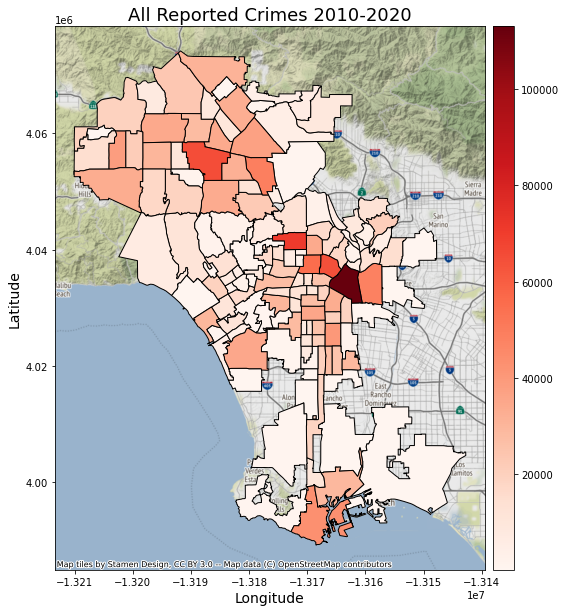

In [46]:
gdf = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(16,10))
plt.title('All Reported Crimes 2010-2020',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf[gdf['AllCrimes_']>100].plot(column='AllCrimes_',ax=ax, legend=True, cax=cax, cmap='Reds',edgecolor='black')
ctx.add_basemap(ax)
#plt.savefig('images/map_allcrimes_2010-2020.png',dpi=235,bbox_inches='tight');

### Top 5 neighborhoods

In [13]:
gdf.sort_values('AllCrimes_',ascending=False)[:5]

,slug,set,kind,external_i,place,display_na,sqmi,type,name_1,slug_1,...,change_13_,change_14_,change_15_,change_16_,change_17_,change_18_,change_19_,last10_pct,last5_pct_,geometry
60,downtown,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),downtown,Downtown,Downtown L.A. County Neighborhood (Current),5.83816978008,segment-of-a-city,None,None,...,-0.039599,0.096608,0.223740,0.070740,0.094344,0.088040,0.015132,0.653411,0.491997,"POLYGON ((-13162439.614 4036687.859, -13162361..."
106,hollywood,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),hollywood,Hollywood,Hollywood L.A. County Neighborhood (Current),3.50639022096,segment-of-a-city,None,None,...,-0.084593,0.004041,0.184952,0.075162,0.103695,0.016799,-0.047975,0.281142,0.332634,"POLYGON ((-13172091.467 4042937.480, -13171779..."
237,van-nuys,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),van-nuys,Van Nuys,Van Nuys L.A. County Neighborhood (Current),8.99090891865,segment-of-a-city,None,None,...,-0.032707,0.023929,0.123963,-0.009944,0.030741,-0.006792,-0.084139,0.010152,0.053829,"POLYGON ((-13188357.669 4058530.022, -13187754..."
257,westlake,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),westlake,Westlake,Westlake L.A. County Neighborhood (Current),2.71730553526,segment-of-a-city,None,None,...,-0.047189,0.064009,0.076458,0.009522,0.022112,-0.004236,-0.018687,0.101214,0.085169,"POLYGON ((-13166903.687 4039133.558, -13166456..."
113,koreatown,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),koreatown,Koreatown,Koreatown L.A. County Neighborhood (Current),2.70048311541,segment-of-a-city,None,None,...,-0.007992,0.080560,0.073376,0.090111,0.041583,-0.020122,-0.081649,0.165342,0.103299,"POLYGON ((-13167638.404 4039079.809, -13167638..."


In [50]:
gdf['AllCrimes_'].sort_values(ascending=False)[:5].sum()/gdf['AllCrimes_'].sort_values(ascending=False).sum()

0.1673770569012615

In [56]:
top5 = gdf.sort_values('AllCrimes_',ascending=False)[:5]

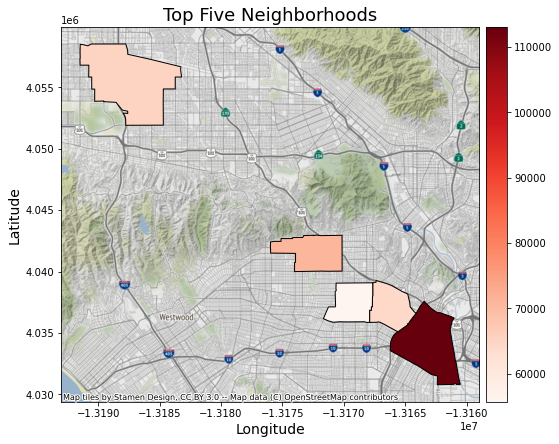

In [60]:
top5 = top5.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(8,8))
plt.title('Top Five Neighborhoods',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
top5.plot(column='AllCrimes_',ax=ax, legend=True, cax=cax, cmap='Reds',edgecolor='black')
ctx.add_basemap(ax)
#plt.savefig('images/map_top5.png',dpi=235,bbox_inches='tight');

### Focus Downtown

In [35]:
crime_gdf = geopandas.GeoDataFrame(
    crime, geometry=geopandas.points_from_xy(crime.LON, crime.LAT))
crime_gdf.crs = {'init' :'epsg:4326'}

/Users/Sam/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


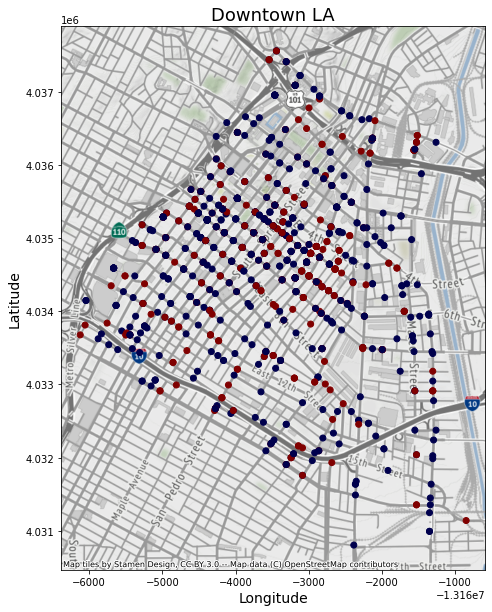

In [51]:
crime_gdf = crime_gdf.to_crs(epsg=3857)
ax = crime_gdf[(crime_gdf['Downtown']==1) & (crime_gdf['2019']==1) & (crime_gdf['March']==1)].plot(column='V',cmap='seismic',figsize=(10,10))
#ax = crime_gdf[(crime_gdf['Downtown']==1) & (crime_gdf['P']==1) & (crime_gdf['2019']==1)].plot(color='b')
plt.title('Downtown LA',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
ctx.add_basemap(ax)
#plt.savefig('images/downtown_2019.png',dpi=235,bbox_inches='tight');

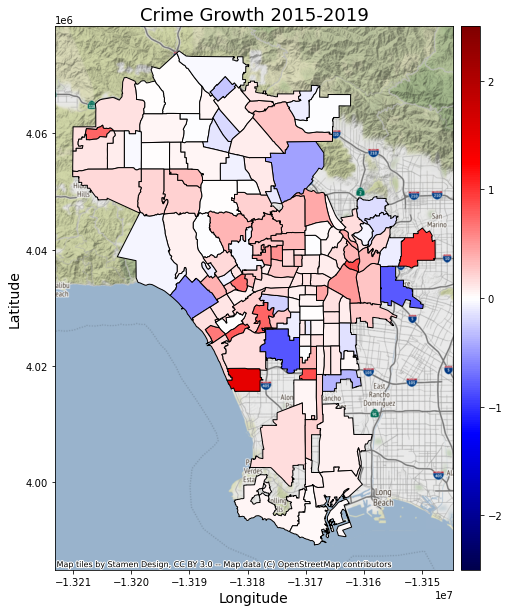

In [61]:
gdf = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(16,10))
plt.title('Crime Growth 2015-2019',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf[gdf['AllCrimes_']>100].plot(column='last5_pct_',ax=ax, legend=True, cax=cax, cmap='seismic',vmin=-2.5,vmax=2.5,edgecolor='black')
ctx.add_basemap(ax);
#plt.savefig('images/map_5yr_change.png',dpi=235,bbox_inches='tight');

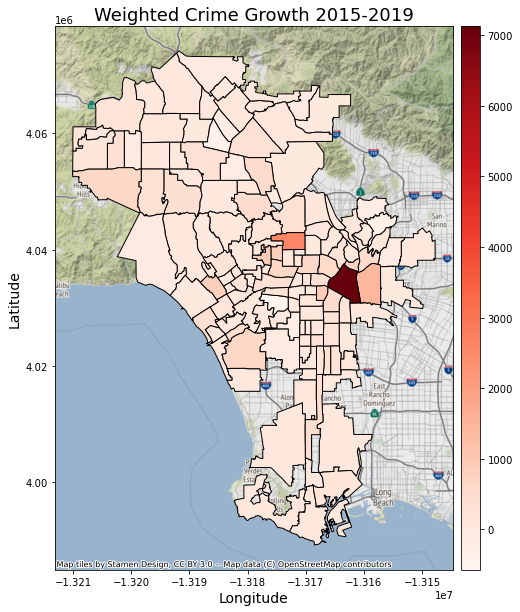

In [106]:
gdf['change_rate5'] = gdf['last5_pct_'].values*gdf['crime_19'].values

gdf = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(16,10))
plt.title('Weighted Crime Growth 2015-2019',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf[gdf['AllCrimes_']>100].plot(column='change_rate5',ax=ax, legend=True, cax=cax, cmap='Reds',edgecolor='black')
ctx.add_basemap(ax);
plt.savefig('images/map_5yr_change_weighted.png',dpi=235,bbox_inches='tight');

#### Weapons Trend

In [73]:
crime[crime['Weapon Used Cd'].isnull()==False].shape[0]/crime.shape[0]

0.33713571850012486

In [79]:
wpns = crime[crime['Weapon Used Cd'].isnull()==False]
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

In [80]:
wpns_yr = []
no_wpns_yr

for year in years:
    wpns_yr.append(wpns[wpns[str(year)]==1].shape[0]/wpns.shape[0])
    


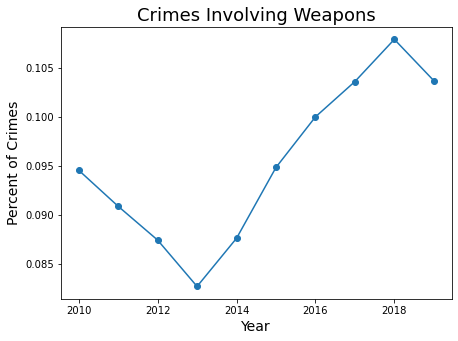

In [88]:
plt.figure(figsize=(7,5))
plt.plot(years,wpns_yr,'o-')
plt.title('Crimes Involving Weapons',fontsize=18)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Percent of Crimes',fontsize=14)
#plt.savefig('images/weapons_yr.png',dpi=235,bbox_inches='tight');

In [98]:
gdf['place'][0]

'Acton'

In [100]:
v_loc = []

for place in gdf['place']:
    v_loc.append(crime[crime[place]==1]['V'].sum()/crime[crime[place]==1].shape[0])

<ipython-input-100-7bba1aa4e305>:4: RuntimeWarning: invalid value encountered in long_scalars
  v_loc.append(crime[crime[place]==1]['V'].sum()/crime[crime[place]==1].shape[0])


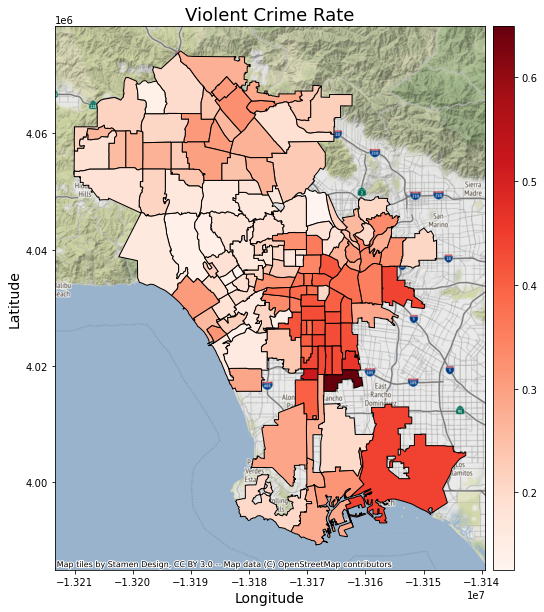

In [105]:
gdf['V_rate'] = v_loc

gdf = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(16,10))
plt.title('Violent Crime Rate',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf[gdf['AllCrimes_']>100].plot(column='V_rate',ax=ax, legend=True, cax=cax, cmap='Reds',edgecolor='black')
ctx.add_basemap(ax);
#plt.savefig('images/map_violent.png',dpi=235,bbox_inches='tight');